In [ ]:
from google.colab import files
uploaded = files.upload()

Saving opel_corsa_01.csv to opel_corsa_01.csv
Saving opel_corsa_02.csv to opel_corsa_02.csv
Saving peugeot_207_01.csv to peugeot_207_01.csv
Saving peugeot_207_02.csv to peugeot_207_02.csv


In [ ]:
import pandas as pd

peugeot_207_01 = pd.read_csv("peugeot_207_01.csv", sep=";")
peugeot_207_02 = pd.read_csv("peugeot_207_02.csv", sep=";")
opel_corsa_01  = pd.read_csv("opel_corsa_01.csv", sep=";")
opel_corsa_02  = pd.read_csv("opel_corsa_02.csv", sep=";")


In [ ]:
print(peugeot_207_01.head)
#peugeot_207_02.head()
#opel_corsa_01.head()
#opel_corsa_02.head()

<bound method NDFrame.head of       Unnamed: 0  AltitudeVariation  VehicleSpeedInstantaneous  \
0             59         -13.399994                  20.699999   
1             60         -13.200005                  17.100000   
2             61         -13.200005                  14.400000   
3             62         -11.800003                  14.400000   
4             63         -19.800003                  14.400000   
...          ...                ...                        ...   
8194        8609          -0.500000                   0.000000   
8195        8610           0.000000                   0.000000   
8196        8611          -0.099998                   0.000000   
8197        8612           0.500000                   0.000000   
8198        8613           0.800003                   0.000000   

      VehicleSpeedAverage  VehicleSpeedVariance  VehicleSpeedVariation  \
0                6.060000            115.840061              -4.500000   
1                6.345000    

***EDA***

In [ ]:
import pandas as pd
from IPython.display import display

def extended_bulk_eda(datasets, target_cols=['DrivingStyle', 'RoadSurfaceCondition', 'TrafficCongestion']):
    """
    datasets: dict of {name: dataframe}
    target_cols: list of target columns to check class distributions
    """
    for name, df in datasets.items():
        print(f"\n===== Dataset: {name} =====")
        print("Shape:", df.shape)

        # Missing values
        missing = df.isna().sum().sort_values(ascending=False)
        print("\nMissing values per column:")
        display(missing)
        high_missing = missing[missing > 0.5 * len(df)]
        if len(high_missing) > 0:
            print("⚠️ Columns with >50% missing values:")
            display(high_missing)

        # Class distributions
        print("\nClass distribution (targets):")
        for col in target_cols:
            if col in df.columns:
                counts = df[col].value_counts()
                display(counts)
                # Highlight potential imbalance (<20% samples)
                total = counts.sum()
                minority = counts[counts/total < 0.2]
                if len(minority) > 0:
                    print(f"⚠️ Minority classes (<20% of samples) in {col}:")
                    display(minority)

        # Numeric summary
        numeric_cols = df.select_dtypes(include='number').columns
        if len(numeric_cols) > 0:
            print("\nNumeric summary:")
            display(df[numeric_cols].describe().T)

        print("\n" + "="*60)

# Example usage with your datasets
dfs = {
    "Peugeot207_01": peugeot_207_01,
    "Peugeot207_02": peugeot_207_02,
    "OpelCorsa_01": opel_corsa_01,
    "OpelCorsa_02": opel_corsa_02
}

extended_bulk_eda(dfs)



===== Dataset: Peugeot207_01 =====
Shape: (8199, 18)

Missing values per column:


,0
ManifoldAbsolutePressure,5
EngineCoolantTemperature,5
FuelConsumptionAverage,5
IntakeAirTemperature,5
EngineLoad,5
EngineRPM,5
MassAirFlow,5
VehicleSpeedInstantaneous,3
AltitudeVariation,0
Unnamed: 0,0



Class distribution (targets):

Numeric summary:


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,8199.0,4289.953531,2482.291344,59.000000,2118.500000,4285.000000,6393.500000,8613.000000
AltitudeVariation,8199.0,-0.167142,2.271266,-24.600006,-1.300003,-0.099998,0.900002,10.299999
VehicleSpeedInstantaneous,8196.0,46.627707,35.940316,0.000000,18.900000,37.799999,81.000000,119.699997
VehicleSpeedAverage,8199.0,46.889535,33.502960,0.000000,19.582499,35.954999,75.337498,114.884996
VehicleSpeedVariance,8199.0,159.545051,188.542234,0.000000,41.323268,103.799893,202.930619,1418.370369
VehicleSpeedVariation,8199.0,-0.020856,2.760644,-103.500000,-0.900000,0.000000,0.900002,97.199997
LongitudinalAcceleration,8199.0,1.127696,0.759994,-1.457600,0.578950,1.161900,1.646400,3.979800
EngineLoad,8194.0,45.079854,30.615258,0.000000,23.137255,40.392159,75.686279,100.000000
EngineCoolantTemperature,8194.0,68.191237,17.535489,12.000000,56.000000,79.000000,79.000000,86.000000
ManifoldAbsolutePressure,8194.0,115.252990,16.322914,88.000000,103.000000,107.000000,126.000000,170.000000




===== Dataset: Peugeot207_02 =====
Shape: (4446, 18)

Missing values per column:


,0
VehicleSpeedInstantaneous,6
Unnamed: 0,0
AltitudeVariation,0
VehicleSpeedAverage,0
VehicleSpeedVariance,0
VehicleSpeedVariation,0
LongitudinalAcceleration,0
EngineLoad,0
EngineCoolantTemperature,0
ManifoldAbsolutePressure,0



Class distribution (targets):

Numeric summary:


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,4446.0,2333.006073,1323.814689,59.000000,1170.250000,2322.500000,3467.750000,4622.000000
AltitudeVariation,4446.0,0.100135,1.797515,-9.199997,-0.599998,0.000000,0.900002,11.400002
VehicleSpeedInstantaneous,4440.0,22.962508,18.623617,0.000000,5.400000,22.500000,36.899998,72.000000
VehicleSpeedAverage,4446.0,22.975994,14.424310,0.000000,11.396250,21.021283,35.459999,59.984998
VehicleSpeedVariance,4446.0,137.937403,132.251407,0.000000,48.322445,103.170886,174.184256,864.046635
VehicleSpeedVariation,4446.0,-0.014014,2.258688,-31.072817,-0.900000,0.000000,0.900000,30.599998
LongitudinalAcceleration,4446.0,-0.137473,0.758267,-3.065000,-0.563500,-0.217000,0.307475,2.244800
EngineLoad,4446.0,39.771728,25.467201,0.000000,27.843138,36.862747,60.000000,100.000000
EngineCoolantTemperature,4446.0,62.056230,18.477506,15.000000,47.000000,66.000000,79.000000,86.000000
ManifoldAbsolutePressure,4446.0,105.556230,5.390143,96.000000,102.000000,103.000000,107.000000,144.000000




===== Dataset: OpelCorsa_01 =====
Shape: (7038, 18)

Missing values per column:


,0
Unnamed: 0,0
AltitudeVariation,0
VehicleSpeedInstantaneous,0
VehicleSpeedAverage,0
VehicleSpeedVariance,0
VehicleSpeedVariation,0
LongitudinalAcceleration,0
EngineLoad,0
EngineCoolantTemperature,0
ManifoldAbsolutePressure,0



Class distribution (targets):

Numeric summary:


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,7038.0,3772.072748,2118.196795,59.000000,1936.250000,3813.500000,5612.750000,7391.000000
AltitudeVariation,7038.0,-0.675845,1.691601,-9.200012,-1.500000,-0.399963,0.100037,5.200012
VehicleSpeedInstantaneous,7038.0,36.428319,32.901312,0.000000,8.782019,29.273399,54.043198,124.749725
VehicleSpeedAverage,7038.0,36.723932,29.366391,0.000000,16.698035,28.312631,47.595544,121.330733
VehicleSpeedVariance,7038.0,213.004353,205.717663,0.000000,54.333652,144.864363,299.377339,1051.789888
VehicleSpeedVariation,7038.0,-0.029563,2.390997,-17.789218,-0.900722,0.000000,0.900721,12.384899
LongitudinalAcceleration,7038.0,0.143530,0.744697,-2.380000,-0.339800,0.140800,0.683600,2.360000
EngineLoad,7038.0,26.487416,19.462750,0.000000,13.725491,25.490196,34.901962,100.000000
EngineCoolantTemperature,7038.0,77.924979,7.076616,40.000000,79.000000,80.000000,81.000000,85.000000
ManifoldAbsolutePressure,7038.0,116.234157,20.660674,98.000000,102.000000,109.000000,122.000000,252.000000




===== Dataset: OpelCorsa_02 =====
Shape: (4092, 18)

Missing values per column:


,0
Unnamed: 0,0
AltitudeVariation,0
VehicleSpeedInstantaneous,0
VehicleSpeedAverage,0
VehicleSpeedVariance,0
VehicleSpeedVariation,0
LongitudinalAcceleration,0
EngineLoad,0
EngineCoolantTemperature,0
ManifoldAbsolutePressure,0



Class distribution (targets):

Numeric summary:


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,4092.0,2198.175953,1248.536624,44.000000,1125.750000,2188.500000,3285.250000,4327.000000
AltitudeVariation,4092.0,-0.139590,2.484872,-8.299988,-2.800003,0.000000,1.024994,10.700012
VehicleSpeedInstantaneous,4092.0,43.482246,37.543881,0.000000,11.259000,34.452538,70.312449,122.723091
VehicleSpeedAverage,4092.0,43.419217,35.323457,0.000000,14.868447,26.422996,70.051620,114.706688
VehicleSpeedVariance,4092.0,162.980180,162.805408,0.000000,42.682230,106.038210,240.313896,956.695096
VehicleSpeedVariation,4092.0,-0.011556,2.227681,-11.934539,-0.900719,0.000000,0.900722,11.259000
LongitudinalAcceleration,4092.0,1.603635,3.057510,-1.710800,-0.254950,0.125000,1.060000,8.477800
EngineLoad,4092.0,34.509613,23.559170,0.000000,20.000000,30.588236,47.843140,100.000000
EngineCoolantTemperature,4092.0,73.378299,12.875391,40.000000,64.000000,80.000000,83.000000,89.000000
ManifoldAbsolutePressure,4092.0,123.764907,30.908416,98.000000,101.000000,110.000000,136.000000,250.000000


In [ ]:
import pandas as pd
from IPython.display import display

def extended_bulk_eda_categorical(datasets):
    """
    Performs EDA on categorical (non-numeric) columns across multiple datasets.
    Shows:
      - number of categorical columns
      - unique values per column
      - most frequent values
      - distribution counts
    """
    for name, df in datasets.items():
        print(f"\n===== Dataset: {name} =====")

        # Select only categorical columns (object or category types)
        cat_cols = df.select_dtypes(include=['object', 'category']).columns

        if len(cat_cols) == 0:
            print("⚠️ No categorical columns found in this dataset.")
            continue

        print(f"Number of categorical columns: {len(cat_cols)}")
        print("Categorical columns:", list(cat_cols))

        for col in cat_cols:
            print(f"\n🧩 Column: {col}")
            print(f"Unique values: {df[col].nunique()}")
            print("Value counts:")
            display(df[col].value_counts())

            # Show the most frequent category
            most_common = df[col].value_counts().idxmax()
            print(f"Most frequent value: {most_common}")

        print("\n" + "="*60)

# Example usage:
dfs = {
    "Peugeot207_01": peugeot_207_01,
    "Peugeot207_02": peugeot_207_02,
    "OpelCorsa_01": opel_corsa_01,
    "OpelCorsa_02": opel_corsa_02
}

extended_bulk_eda_categorical(dfs)



===== Dataset: Peugeot207_01 =====
Number of categorical columns: 3
Categorical columns: ['roadSurface', 'traffic', 'drivingStyle']

🧩 Column: roadSurface
Unique values: 3
Value counts:


,count
roadSurface,
SmoothCondition,3274
UnevenCondition,3042
FullOfHolesCondition,1883


Most frequent value: SmoothCondition

🧩 Column: traffic
Unique values: 3
Value counts:


,count
traffic,
LowCongestionCondition,6844
NormalCongestionCondition,696
HighCongestionCondition,659


Most frequent value: LowCongestionCondition

🧩 Column: drivingStyle
Unique values: 2
Value counts:


,count
drivingStyle,
EvenPaceStyle,7716
AggressiveStyle,483


Most frequent value: EvenPaceStyle


===== Dataset: Peugeot207_02 =====
Number of categorical columns: 3
Categorical columns: ['roadSurface', 'traffic', 'drivingStyle']

🧩 Column: roadSurface
Unique values: 3
Value counts:


,count
roadSurface,
UnevenCondition,2802
FullOfHolesCondition,1366
SmoothCondition,278


Most frequent value: UnevenCondition

🧩 Column: traffic
Unique values: 3
Value counts:


,count
traffic,
HighCongestionCondition,1813
NormalCongestionCondition,1765
LowCongestionCondition,868


Most frequent value: HighCongestionCondition

🧩 Column: drivingStyle
Unique values: 2
Value counts:


,count
drivingStyle,
EvenPaceStyle,4259
AggressiveStyle,187


Most frequent value: EvenPaceStyle


===== Dataset: OpelCorsa_01 =====
Number of categorical columns: 3
Categorical columns: ['roadSurface', 'traffic', 'drivingStyle']

🧩 Column: roadSurface
Unique values: 2
Value counts:


,count
roadSurface,
SmoothCondition,6873
UnevenCondition,165


Most frequent value: SmoothCondition

🧩 Column: traffic
Unique values: 3
Value counts:


,count
traffic,
LowCongestionCondition,6461
HighCongestionCondition,449
NormalCongestionCondition,128


Most frequent value: LowCongestionCondition

🧩 Column: drivingStyle
Unique values: 2
Value counts:


,count
drivingStyle,
EvenPaceStyle,5751
AggressiveStyle,1287


Most frequent value: EvenPaceStyle


===== Dataset: OpelCorsa_02 =====
Number of categorical columns: 3
Categorical columns: ['roadSurface', 'traffic', 'drivingStyle']

🧩 Column: roadSurface
Unique values: 2
Value counts:


,count
roadSurface,
SmoothCondition,3812
UnevenCondition,280


Most frequent value: SmoothCondition

🧩 Column: traffic
Unique values: 3
Value counts:


,count
traffic,
LowCongestionCondition,3591
NormalCongestionCondition,405
HighCongestionCondition,96


Most frequent value: LowCongestionCondition

🧩 Column: drivingStyle
Unique values: 2
Value counts:


,count
drivingStyle,
EvenPaceStyle,3290
AggressiveStyle,802


Most frequent value: EvenPaceStyle



Seeing as the Dataset: Peugeot207_01 ===== Shape: (8199, 18) has the misssing values [ManifoldAbsolutePressure 5, EngineCoolantTemperature 5, FuelConsumptionAverage 5, IntakeAirTemperature 5, EngineLoad 5, EngineRPM 5, MassAirFlow 5, VehicleSpeedInstantaneous 3].
And the Dataset: Peugeot207_02 ===== Shape: (4446, 18) has the Missing values [VehicleSpeedInstantaneous 6]

The total missing values per column is  <0.2% of the dataset. That quantity is tiny even negligible so I am going to drop all missing rows.

I will also drop the Unnnamed: 0 column as well

In [ ]:
dfs_cleaned = {}

for name, df in dfs.items():
    print(f"\n=== Cleaning {name} ===")
    print("Before:", df.shape)

    # Drop the unwanted 'Unnamed: 0' column first (if it exists)
    if 'Unnamed: 0' in df.columns:
        df = df.drop(columns=['Unnamed: 0'])
        print("Dropped column: 'Unnamed: 0'")

    # Drop rows with missing values
    cleaned_df = df.dropna()

    dfs_cleaned[name] = cleaned_df
    print("After:", cleaned_df.shape)



=== Cleaning Peugeot207_01 ===
Before: (8199, 18)
Dropped column: 'Unnamed: 0'
After: (8192, 17)

=== Cleaning Peugeot207_02 ===
Before: (4446, 18)
Dropped column: 'Unnamed: 0'
After: (4440, 17)

=== Cleaning OpelCorsa_01 ===
Before: (7038, 18)
Dropped column: 'Unnamed: 0'
After: (7038, 17)

=== Cleaning OpelCorsa_02 ===
Before: (4092, 18)
Dropped column: 'Unnamed: 0'
After: (4092, 17)


I am going to create visualisations to understand the data features. I am going to be looking at the following:

Target Distribution (Class Balance) - This gives a quick overview of Low, High, Normal in each vehicle/run.

Violin Plots for Numeric Features vs Traffic - Features with medians clearly separated by traffic class → strong predictors, Features overlapping heavily → less predictive and Outliers → might need scaling later.

Pairplot / Scatterplot Matrix - This lets you see clustering patterns between classes.

Correlation Heatmap (Numeric Features) - Helps identify: Highly correlated features (possible redundancy) and Features that might predict traffic better

Cross-Vehicle / Run Consistency - Check if distributions are similar; if not, you may need per-vehicle scaling.


In [ ]:
for name, df in dfs_cleaned.items():
    print(f"{name}: {df.shape[0]} rows, {df.shape[1]} columns")


Peugeot207_01: 8192 rows, 17 columns
Peugeot207_02: 4440 rows, 17 columns
OpelCorsa_01: 7038 rows, 17 columns
OpelCorsa_02: 4092 rows, 17 columns


In [ ]:
for name, df in dfs_cleaned.items():
    print(f"{name} columns:", df.columns.tolist())


Peugeot207_01 columns: ['AltitudeVariation', 'VehicleSpeedInstantaneous', 'VehicleSpeedAverage', 'VehicleSpeedVariance', 'VehicleSpeedVariation', 'LongitudinalAcceleration', 'EngineLoad', 'EngineCoolantTemperature', 'ManifoldAbsolutePressure', 'EngineRPM', 'MassAirFlow', 'IntakeAirTemperature', 'VerticalAcceleration', 'FuelConsumptionAverage', 'roadSurface', 'traffic', 'drivingStyle']
Peugeot207_02 columns: ['AltitudeVariation', 'VehicleSpeedInstantaneous', 'VehicleSpeedAverage', 'VehicleSpeedVariance', 'VehicleSpeedVariation', 'LongitudinalAcceleration', 'EngineLoad', 'EngineCoolantTemperature', 'ManifoldAbsolutePressure', 'EngineRPM', 'MassAirFlow', 'IntakeAirTemperature', 'VerticalAcceleration', 'FuelConsumptionAverage', 'roadSurface', 'traffic', 'drivingStyle']
OpelCorsa_01 columns: ['AltitudeVariation', 'VehicleSpeedInstantaneous', 'VehicleSpeedAverage', 'VehicleSpeedVariance', 'VehicleSpeedVariation', 'LongitudinalAcceleration', 'EngineLoad', 'EngineCoolantTemperature', 'Manifold

In [ ]:
# Rename 'traffic' column to 'traffic_congestion' in all cleaned DataFrames
for name, df in dfs_cleaned.items():
    if 'traffic' in df.columns:
        dfs_cleaned[name] = df.rename(columns={'traffic': 'traffic_congestion'})


In [ ]:
for name, df in dfs_cleaned.items():
    print(f"{name} columns:", df.columns.tolist())

Peugeot207_01 columns: ['AltitudeVariation', 'VehicleSpeedInstantaneous', 'VehicleSpeedAverage', 'VehicleSpeedVariance', 'VehicleSpeedVariation', 'LongitudinalAcceleration', 'EngineLoad', 'EngineCoolantTemperature', 'ManifoldAbsolutePressure', 'EngineRPM', 'MassAirFlow', 'IntakeAirTemperature', 'VerticalAcceleration', 'FuelConsumptionAverage', 'roadSurface', 'traffic_congestion', 'drivingStyle']
Peugeot207_02 columns: ['AltitudeVariation', 'VehicleSpeedInstantaneous', 'VehicleSpeedAverage', 'VehicleSpeedVariance', 'VehicleSpeedVariation', 'LongitudinalAcceleration', 'EngineLoad', 'EngineCoolantTemperature', 'ManifoldAbsolutePressure', 'EngineRPM', 'MassAirFlow', 'IntakeAirTemperature', 'VerticalAcceleration', 'FuelConsumptionAverage', 'roadSurface', 'traffic_congestion', 'drivingStyle']
OpelCorsa_01 columns: ['AltitudeVariation', 'VehicleSpeedInstantaneous', 'VehicleSpeedAverage', 'VehicleSpeedVariance', 'VehicleSpeedVariation', 'LongitudinalAcceleration', 'EngineLoad', 'EngineCoolantT

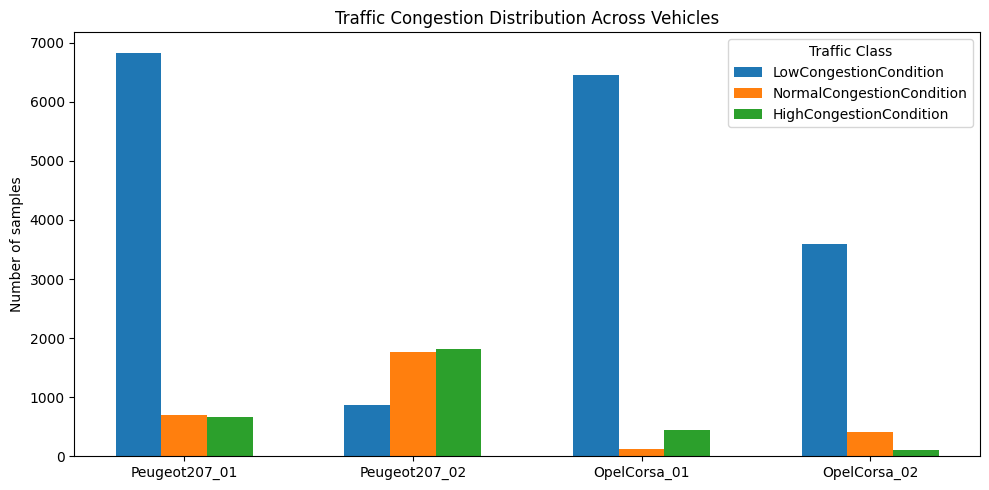

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

datasets = list(dfs_cleaned.keys())
classes = ['LowCongestionCondition', 'NormalCongestionCondition', 'HighCongestionCondition']

# Collect counts
counts = []
for name, df in dfs_cleaned.items():
    counts.append([df['traffic_congestion'].value_counts().get(c, 0) for c in classes])

counts = np.array(counts)  # shape (4 datasets, 3 classes)

# Plot
plt.figure(figsize=(10,5))

bar_width = 0.2
x = np.arange(len(datasets))  # positions for datasets

for i, cls in enumerate(classes):
    plt.bar(x + i*bar_width, counts[:, i], width=bar_width, label=cls)

plt.ylabel("Number of samples")
plt.title("Traffic Congestion Distribution Across Vehicles")
plt.xticks(x + bar_width, datasets)
plt.legend(title="Traffic Class")
plt.tight_layout()
plt.show()


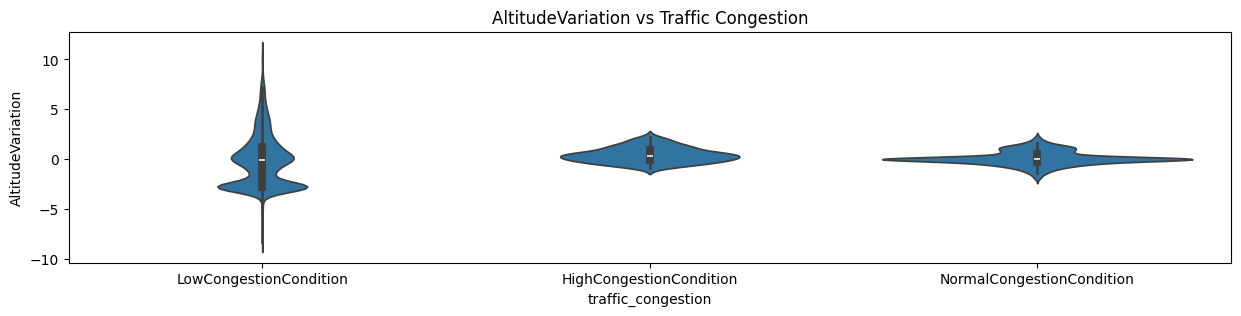

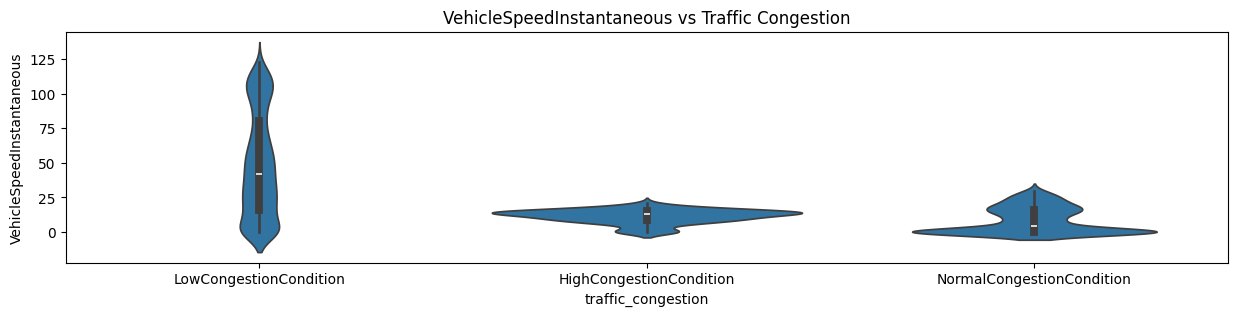

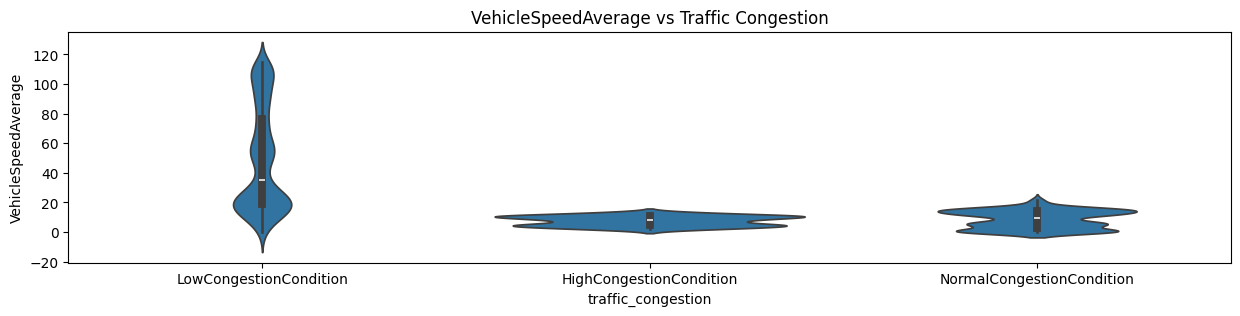

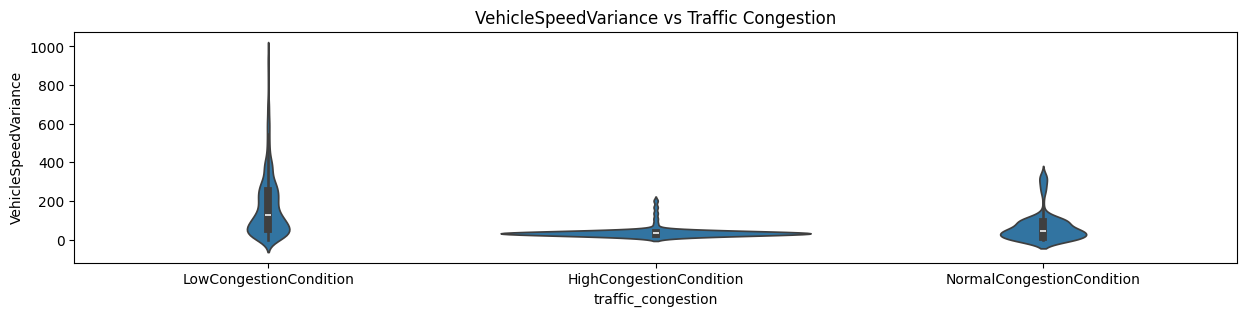

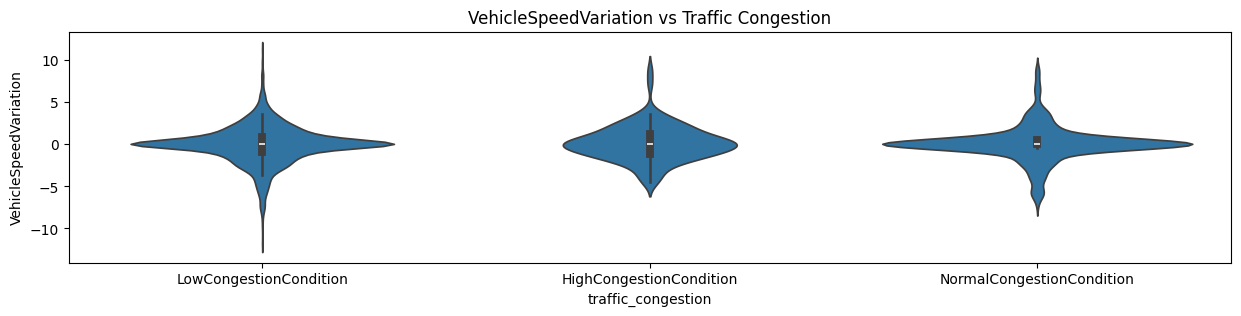

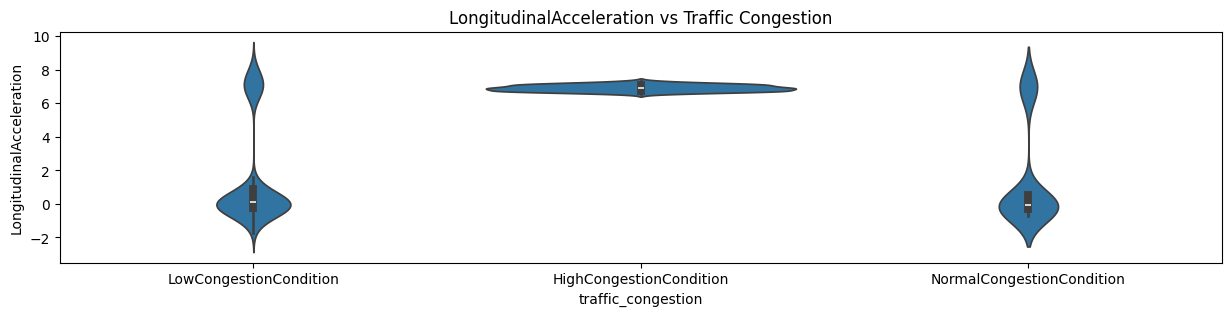

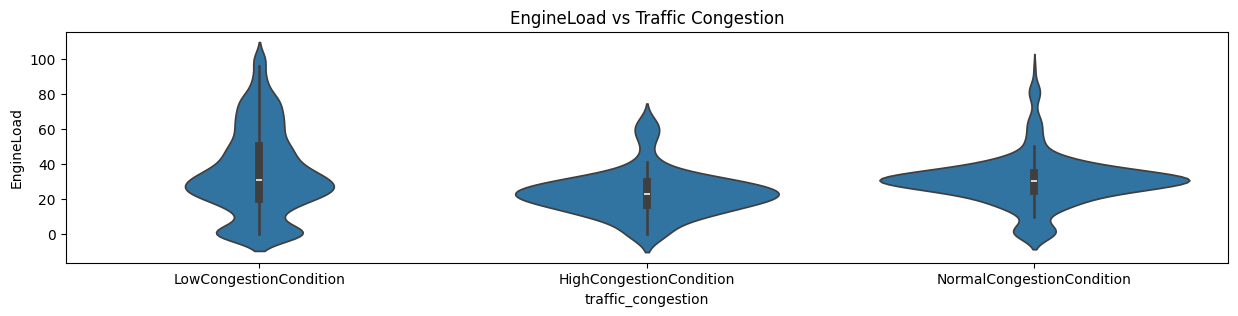

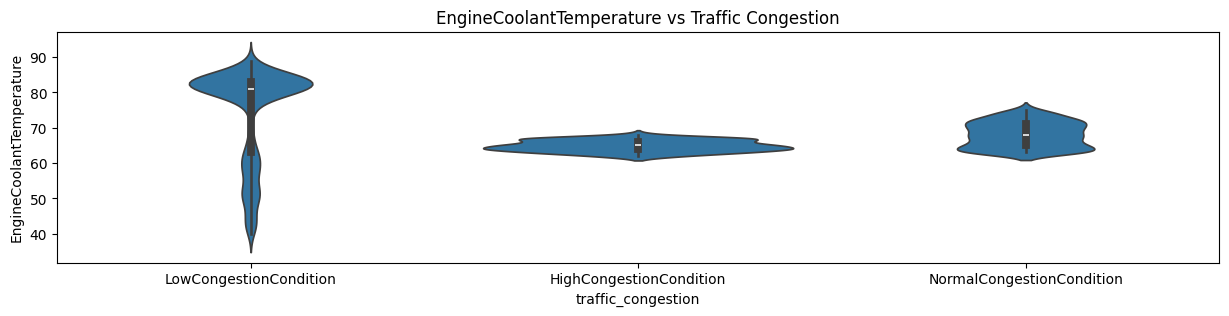

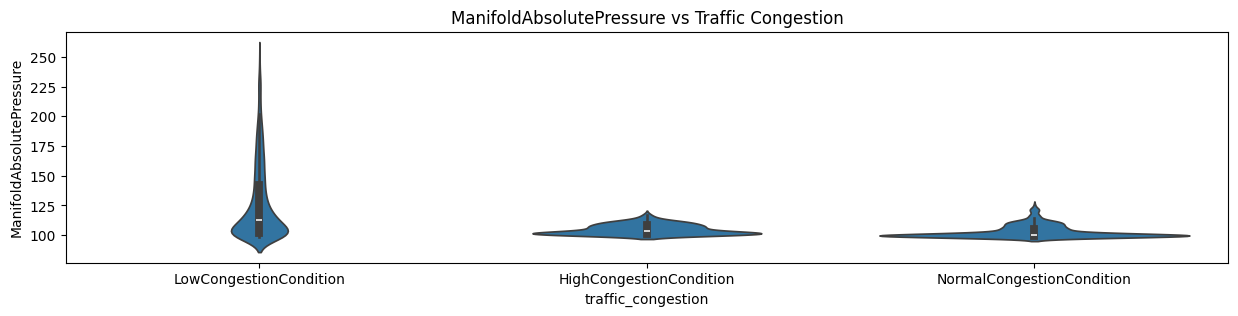

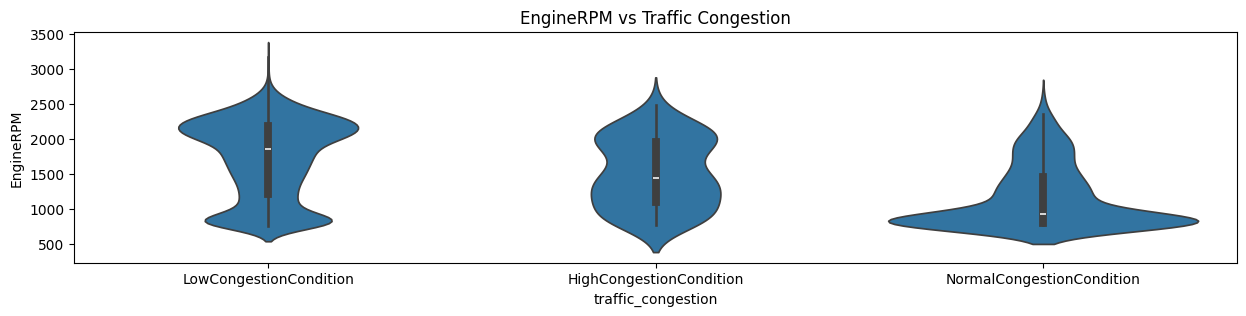

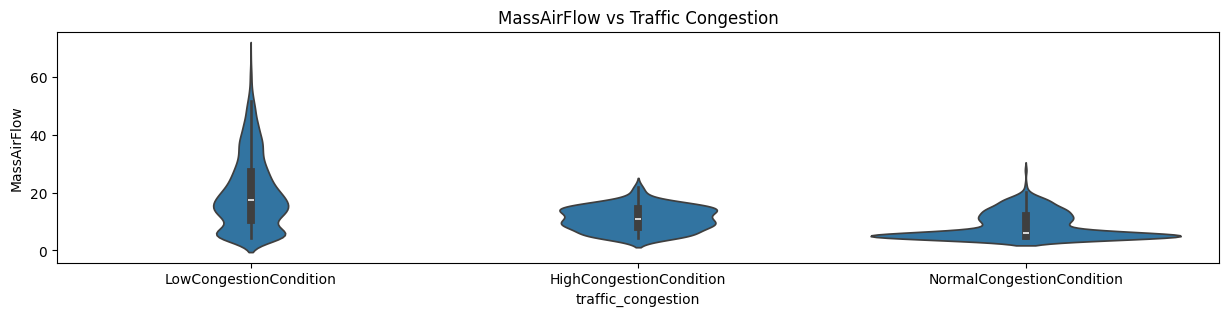

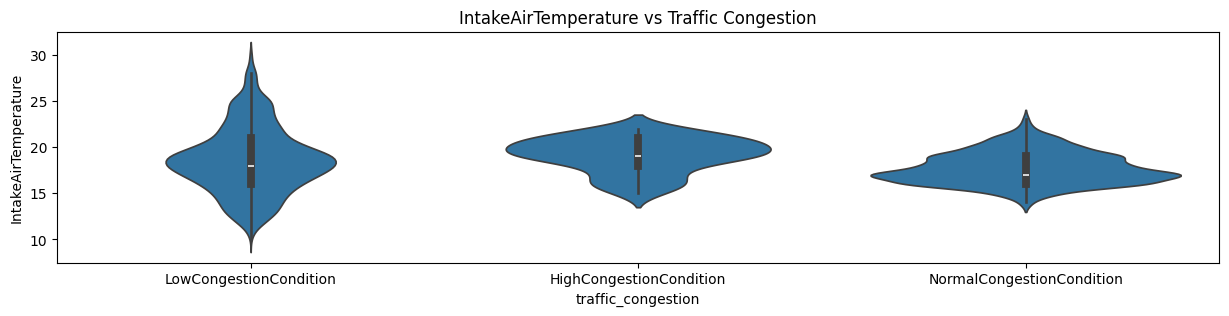

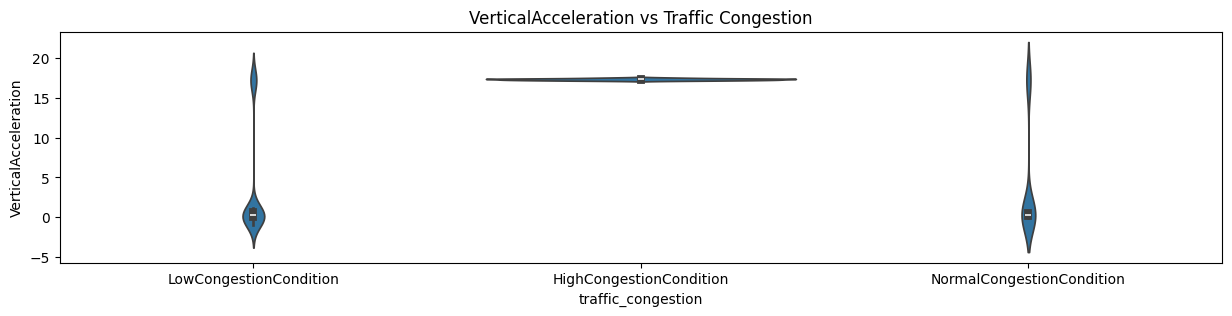

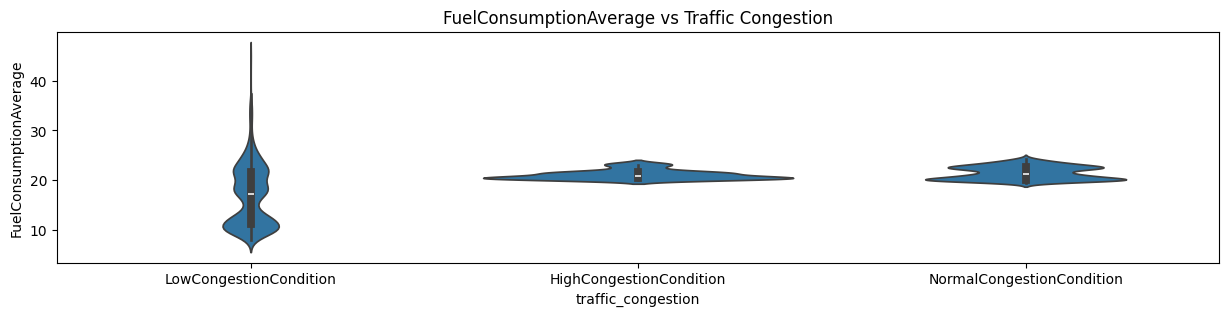

In [ ]:
# Identify numeric columns automatically
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

#remove the target column if it's numeric
if 'traffic_congestion' in numeric_cols:
    numeric_cols.remove('traffic_congestion')

# Now plot violin plots for each numeric column
for col in numeric_cols:
    plt.figure(figsize=(15, 3))
    sns.violinplot(x='traffic_congestion', y=col, data=df)
    plt.title(f"{col} vs Traffic Congestion")
    plt.show()


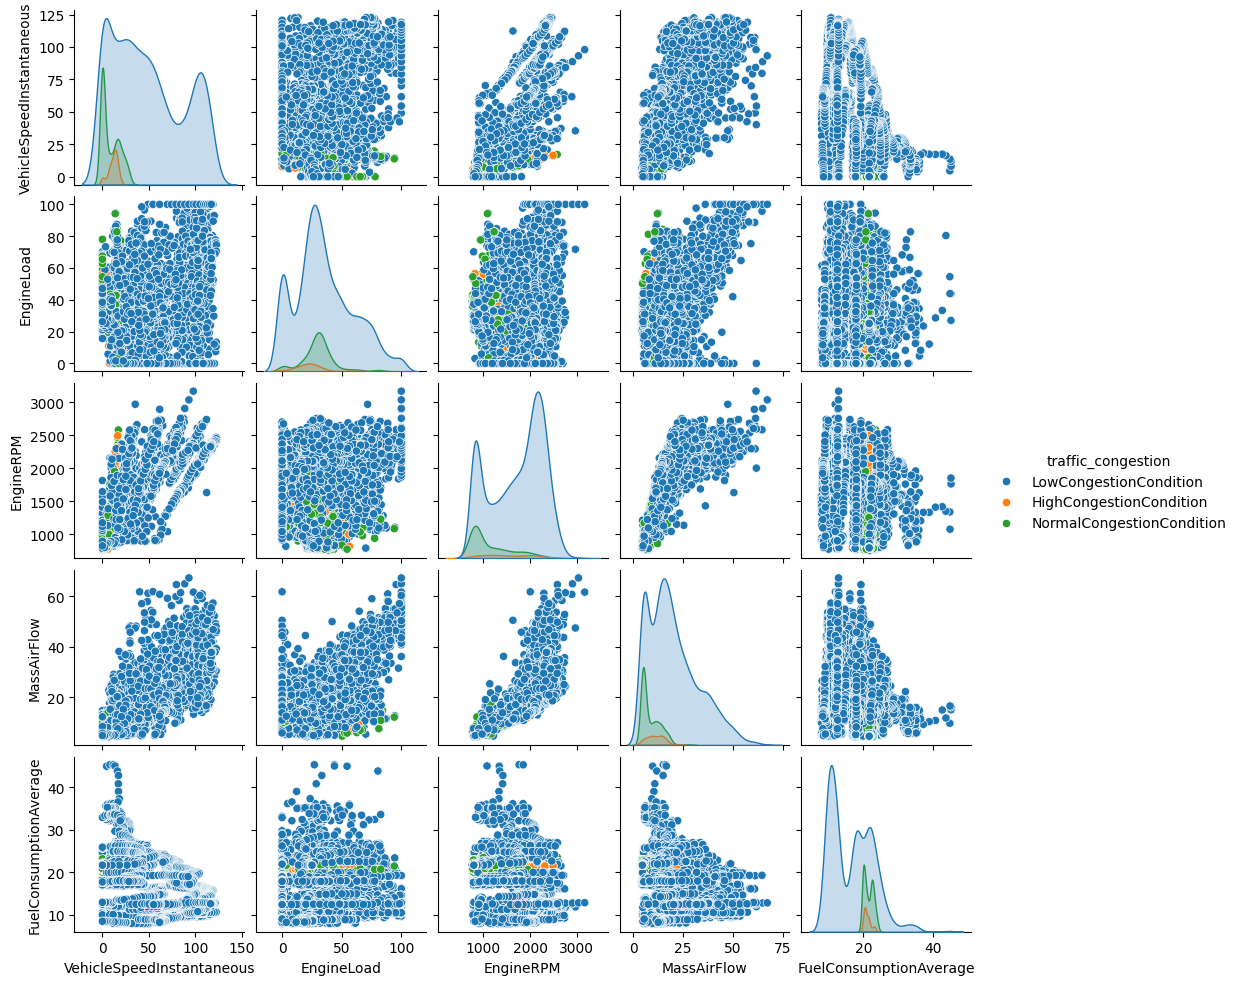

In [ ]:
subset_cols = ['VehicleSpeedInstantaneous', 'EngineLoad', 'EngineRPM', 'MassAirFlow', 'FuelConsumptionAverage', 'traffic_congestion']
sns.pairplot(df[subset_cols], hue='traffic_congestion', diag_kind='kde', height=2)
plt.show()

For the above, The features chosen for the pairplot—vehiclespeedinstantaneous, engineload, enginerpm, massairflow, and fuelconsumptionaverage—are numeric variables that are directly influenced by driving patterns and traffic conditions. They provide insight into vehicle behavior such as speed, engine effort, and fuel usage, which can differentiate between low, normal, and high congestion. Including the traffic column as hue allows visualization of how these features cluster according to traffic class. This subset balances clarity and informativeness, avoiding clutter while highlighting features most likely to separate the classes.

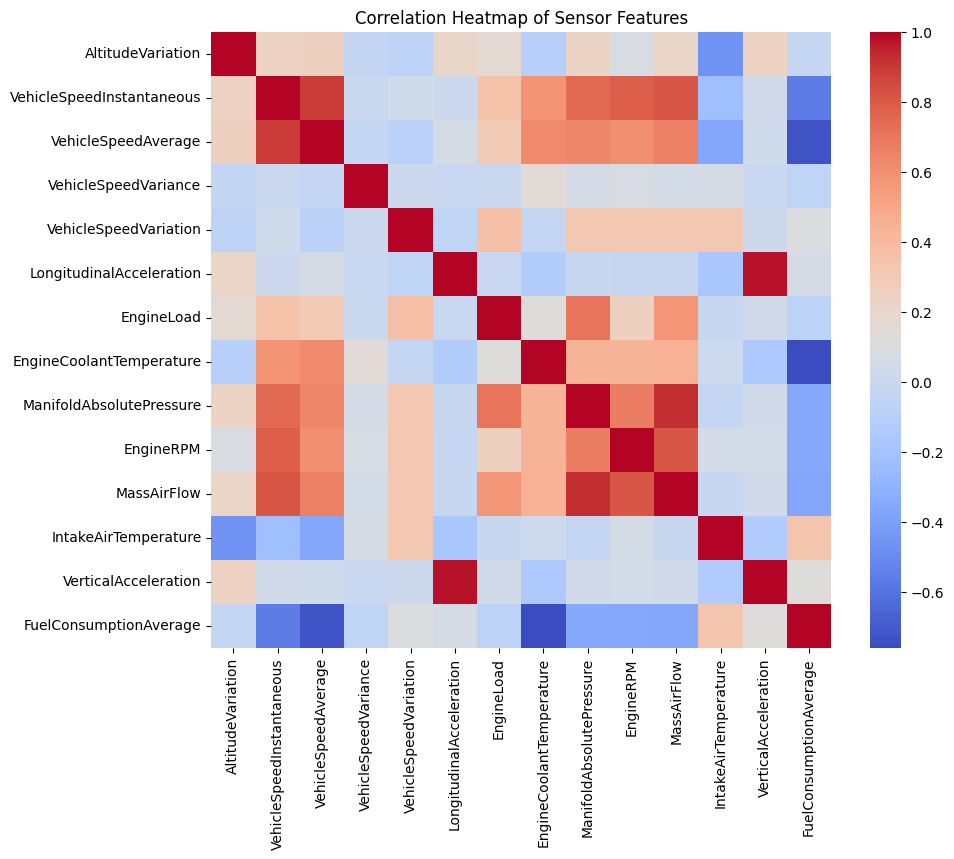

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes(include=['float', 'int']).corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap of Sensor Features")
plt.show()


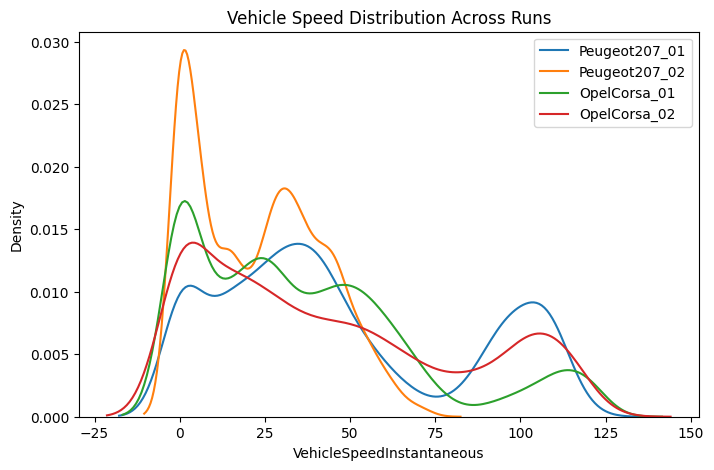

In [ ]:
plt.figure(figsize=(8,5))
for name, df in dfs_cleaned.items():
    sns.kdeplot(df['VehicleSpeedInstantaneous'], label=name)
plt.title("Vehicle Speed Distribution Across Runs")
plt.legend()
plt.show()

In [ ]:
for name, df in dfs_cleaned.items():
    print(f"\n{name} - Traffic Congestion Distribution:")
    print(df['traffic_congestion'].value_counts())
    print("Percentage:")
    print(round(df['traffic_congestion'].value_counts(normalize=True) * 100, 2))



Peugeot207_01 - Traffic Congestion Distribution:
traffic_congestion
LowCongestionCondition       6837
NormalCongestionCondition     696
HighCongestionCondition       659
Name: count, dtype: int64
Percentage:
traffic_congestion
LowCongestionCondition       83.46
NormalCongestionCondition     8.50
HighCongestionCondition       8.04
Name: proportion, dtype: float64

Peugeot207_02 - Traffic Congestion Distribution:
traffic_congestion
HighCongestionCondition      1811
NormalCongestionCondition    1761
LowCongestionCondition        868
Name: count, dtype: int64
Percentage:
traffic_congestion
HighCongestionCondition      40.79
NormalCongestionCondition    39.66
LowCongestionCondition       19.55
Name: proportion, dtype: float64

OpelCorsa_01 - Traffic Congestion Distribution:
traffic_congestion
LowCongestionCondition       6461
HighCongestionCondition       449
NormalCongestionCondition     128
Name: count, dtype: int64
Percentage:
traffic_congestion
LowCongestionCondition       91.80
HighCo

Looking at the first visualization

| Dataset       | Low (%) | Normal (%) | High (%) |
| ------------- | ------- | ---------- | -------- |
| Peugeot207_01 | 83.46   | 8.50       | 8.04     |
| Peugeot207_02 | 19.55   | 39.66      | 40.79    |
| OpelCorsa_01  | 91.80   | 1.82       | 6.38     |
| OpelCorsa_02  | 87.76   | 9.90       | 2.35     |

Interpretation:

Peugeot207_02 is relatively balanced — classes are roughly even.

All others (especially OpelCorsa) are dominated by “LowCongestionCondition”, meaning models trained on them will tend to predict “Low” almost all the time.

This is a classic class imbalance problem.


Class imbalance causes:

The classifier to favor the majority class, achieving high overall accuracy but poor recall for minority classes.

Poor model generalization — it might miss congestion spikes or high-traffic events (which are usually the important cases!).


Also Correlation plot shows high correlation between VehicleSpeedInstanteneous and VehicleSpeedAverage, MassAirFlow and ManifoldAbsolutePressure, LongitudinalAcceleration and VerticalAcceleration as well as VehicleSpeedInstanteneous and EngineRPM


***PREPROCESSING***

I will be encoding the target variable and selecting the right features using ANOVA test and the correlation matrix defined earlier

In [ ]:
dfs_traffic = {}

for name, df in dfs_cleaned.items():
    # Drop irrelevant label columns if they exist
    drop_cols = [col for col in ['roadSurface', 'drivingStyle'] if col in df.columns]
    df_traffic = df.drop(columns=drop_cols, errors='ignore')

    dfs_traffic[name] = df_traffic

print("Created dfs_traffic with relevant columns only.")
for name, df in dfs_traffic.items():
    print(f"{name}: {df.shape}")


Created dfs_traffic with relevant columns only.
Peugeot207_01: (8192, 15)
Peugeot207_02: (4440, 15)
OpelCorsa_01: (7038, 15)
OpelCorsa_02: (4092, 15)


In [ ]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

def feature_engineering(df):
    df = df.copy()

    # Encode target variable
    label_map = {
        'LowCongestionCondition': 0,
        'NormalCongestionCondition': 1,
        'HighCongestionCondition': 2
    }
    df['traffic_congestion'] = df['traffic_congestion'].map(label_map)

    # Feature Engineering
    if all(col in df.columns for col in ['vehiclespeedinstantaneous', 'enginerpm']):
        df['speed_rpm_ratio'] = df['vehiclespeedinstantaneous'] / (df['enginerpm'] + 1e-5)

    if all(col in df.columns for col in ['engineload', 'enginerpm']):
        df['engine_stress'] = df['engineload'] * df['enginerpm']

    if all(col in df.columns for col in ['fuelconsumptionaverage', 'vehiclespeedinstantaneous']):
        df['fuel_efficiency'] = df['vehiclespeedinstantaneous'] / (df['fuelconsumptionaverage'] + 1e-5)

    # Drop NaNs created by divisions
    df = df.dropna()

    return df

# Apply to all datasets in bulk
dfs_engineered = {name: feature_engineering(df) for name, df in dfs_traffic.items()}

print("Feature engineering complete for all datasets.")
for name, df in dfs_engineered.items():
    print(f"{name}: {df.shape}")


Feature engineering complete for all datasets.
Peugeot207_01: (8192, 15)
Peugeot207_02: (4440, 15)
OpelCorsa_01: (7038, 15)
OpelCorsa_02: (4092, 15)


In [ ]:
for name, df in dfs_engineered.items():
    print(f"\n{name} - Top 5 Rows:")
    display(df.head())



Peugeot207_01 - Top 5 Rows:


,AltitudeVariation,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage,traffic_congestion
0,-13.399994,20.699999,6.060,115.840061,-4.500000,1.0548,38.039215,31.0,101.0,798.0,6.22,15.0,-0.5982,27.919697,0
1,-13.200005,17.100000,6.345,117.200816,-3.599998,0.9012,38.039215,31.0,101.0,797.5,6.27,15.0,-0.5244,26.458355,0
2,-13.200005,14.400000,6.585,117.559595,-2.700001,0.9331,90.588234,32.0,101.0,797.5,6.27,15.0,-0.5068,26.458355,0
3,-11.800003,14.400000,6.825,117.801222,0.000000,0.9878,90.588234,32.0,101.0,726.0,8.63,15.0,-0.4882,26.004126,0
4,-19.800003,14.400000,7.065,117.925697,0.000000,1.1316,92.941177,32.0,101.0,784.0,8.88,15.0,-0.6712,25.295498,0



Peugeot207_02 - Top 5 Rows:


,AltitudeVariation,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage,traffic_congestion
0,-0.599998,24.299999,8.720689,46.843772,6.299999,-1.2903,67.058823,26,115,1809.0,22.360001,15,0.1468,28.784592,1
1,0.099998,27.900000,9.045762,52.270798,3.600000,-1.4038,0.000000,26,107,947.5,23.129999,17,0.2022,28.728073,1
2,-0.200001,30.599998,9.405000,59.127937,2.699999,-1.3209,28.235294,26,103,797.0,10.130000,17,0.1834,27.799021,1
3,-0.899998,29.699999,9.900000,64.360674,-0.900000,-1.4974,0.000000,26,101,1112.0,6.050000,15,0.2099,26.150261,1
4,-0.900002,28.799999,10.380000,68.519589,-0.900000,-1.3275,71.764709,26,102,1150.0,11.740000,15,0.2898,25.721266,1



OpelCorsa_01 - Top 5 Rows:


,AltitudeVariation,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage,traffic_congestion
0,-2.299988,25.670519,13.223501,121.592690,-2.476980,0.3555,4.705883,68,106,1796,15.81,24,-0.1133,19.497335,0
1,-2.099976,24.094259,13.638919,120.422571,-1.576260,0.4492,10.588236,68,103,1689,14.65,22,-0.1289,19.515722,0
2,-1.500000,22.743179,14.031043,118.456769,-1.351080,0.4258,27.450981,68,103,1599,11.85,21,-0.1328,19.441765,0
3,0.100037,22.292820,14.171073,117.571308,-0.450359,0.4140,24.313726,69,104,1620,12.21,20,-0.0859,19.388769,0
4,0.099976,23.643900,14.328954,117.074149,1.351080,0.3945,20.000000,69,104,1708,11.91,21,-0.0664,19.301638,0



OpelCorsa_02 - Top 5 Rows:


,AltitudeVariation,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage,traffic_congestion
0,0.599976,3.828060,8.147763,25.316045,-1.576261,7.1411,46.274509,42,99,899,6.20,19,16.9427,35.635880,0
1,0.600037,5.629500,8.234082,24.411716,1.801440,6.9776,56.470589,42,101,1066,10.96,19,17.0199,36.048752,0
2,0.700012,8.106480,8.346672,23.596122,2.476980,7.1102,34.509804,42,102,1629,10.93,22,17.0740,36.117695,0
3,0.699951,9.232380,8.466768,22.917750,1.125900,7.1609,27.843138,42,103,1629,12.85,22,17.0855,36.160938,0
4,0.500000,11.709359,8.643159,22.150958,2.476979,7.2194,4.705883,42,104,1849,14.82,22,17.0393,36.187778,0


In [ ]:
from scipy.stats import f_oneway
import pandas as pd

def anova_bulk(dfs, target_variable='traffic_congestion'):
    results = {}

    for name, df in dfs.items():
        print(f"\n=== {name} ===")
        numeric_features = df.select_dtypes(include=['number']).columns.tolist()
        anova_results = {}

        for feature in numeric_features:
            groups = [group[feature].values for _, group in df.groupby(target_variable)]
            if len(groups) > 1:
                f_stat, p_value = f_oneway(*groups)
                anova_results[feature] = {'F_statistic': f_stat, 'p_value': p_value}

        results[name] = pd.DataFrame(anova_results).T.sort_values('p_value')
        print(results[name])

    return results

anova_results_bulk = anova_bulk(dfs_engineered)



=== Peugeot207_01 ===
                           F_statistic        p_value
traffic_congestion                 inf   0.000000e+00
MassAirFlow                 447.999809  2.303796e-185
VehicleSpeedInstantaneous   404.443524  3.128763e-168
EngineRPM                   383.507380  6.162408e-160
VehicleSpeedAverage         366.430539  3.836497e-153
LongitudinalAcceleration    301.486249  4.595796e-127
FuelConsumptionAverage      255.055594  3.498630e-108
VerticalAcceleration        248.424489  1.806949e-105
EngineCoolantTemperature    247.798017  3.261932e-105
ManifoldAbsolutePressure    239.275279  1.016388e-101
VehicleSpeedVariance        149.590447   1.557092e-64
IntakeAirTemperature        147.376708   1.318512e-63
EngineLoad                   52.714549   1.788468e-23
AltitudeVariation             3.728794   2.406259e-02
VehicleSpeedVariation         0.204701   8.148955e-01

=== Peugeot207_02 ===
                           F_statistic        p_value
VehicleSpeedAverage        1240.5593

/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)


Note: A good p-value is from 0.05 to 0 i.e the closer to 0, the better. Then, the interpretation of the F-statistic values should be done in conjunction with the p-values, the higher their values, the better.

Values with high correlation can cause a model to be overfit, So, based on the correlation matrix defined earlier,  I will remove VehicleSpeedInstanteneous  MassAirFlow, VerticalAcceleration.

Also, based on the F-statistic and P-value, I will remove VehicleSpeedVariation as well.

With that in mind, the columns that I am going to use in this project are: ['AltitudeVariation', 'VehicleSpeedVariance',  'LongitudinalAcceleration', 'EngineLoad', 'EngineCoolantTemperature', 'ManifoldAbsolutePressure', 'EngineRPM', 'IntakeAirTemperature', 'FuelConsumptionAverage',  'traffic']

In [ ]:
# Define final selected features (after feature selection and correlation analysis)
final_features = [
    'AltitudeVariation', 'VehicleSpeedVariance', 'LongitudinalAcceleration',
    'EngineLoad', 'EngineCoolantTemperature', 'ManifoldAbsolutePressure',
    'EngineRPM', 'IntakeAirTemperature', 'FuelConsumptionAverage',
    'traffic_congestion'
]

# Create the final dataset dictionary
dfs_final = {}

for name, df in dfs_engineered.items():
    df_final = df[final_features].copy()
    dfs_final[name] = df_final
    print(f"{name} - Final dataset shape: {df_final.shape}")

print("\nFinal datasets created successfully and ready for preprocessing/modeling.")


Peugeot207_01 - Final dataset shape: (8192, 10)
Peugeot207_02 - Final dataset shape: (4440, 10)
OpelCorsa_01 - Final dataset shape: (7038, 10)
OpelCorsa_02 - Final dataset shape: (4092, 10)

Final datasets created successfully and ready for preprocessing/modeling.


***MODEL***

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

def scale_features_bulk(dfs, target_col='traffic_congestion'):
    scaled_dfs = {}
    scalers = {}

    for name, df in dfs.items():
        X = df.drop(columns=[target_col])
        y = df[target_col]

        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
        X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

        scaled_dfs[name] = {'X': X_scaled, 'y': y}
        scalers[name] = scaler

    return scaled_dfs, scalers

# Apply scaling
scaled_data, scalers = scale_features_bulk(dfs_final)


In [ ]:
from imblearn.over_sampling import SMOTE

def apply_smote_bulk(scaled_data):
    smote_data = {}

    for name, data in scaled_data.items():
        X = data['X']
        y = data['y']

        smote = SMOTE(random_state=42)
        X_bal, y_bal = smote.fit_resample(X, y)

        smote_data[name] = {'X': X_bal, 'y': y_bal}
        print(f"{name}: Original={y.value_counts().to_dict()}, After SMOTE={pd.Series(y_bal).value_counts().to_dict()}")

    return smote_data

# Apply SMOTE
smote_data = apply_smote_bulk(scaled_data)


Peugeot207_01: Original={0: 6837, 1: 696, 2: 659}, After SMOTE={0: 6837, 1: 6837, 2: 6837}
Peugeot207_02: Original={2: 1811, 1: 1761, 0: 868}, After SMOTE={1: 1811, 2: 1811, 0: 1811}
OpelCorsa_01: Original={0: 6461, 2: 449, 1: 128}, After SMOTE={0: 6461, 1: 6461, 2: 6461}
OpelCorsa_02: Original={0: 3591, 1: 405, 2: 96}, After SMOTE={0: 3591, 2: 3591, 1: 3591}


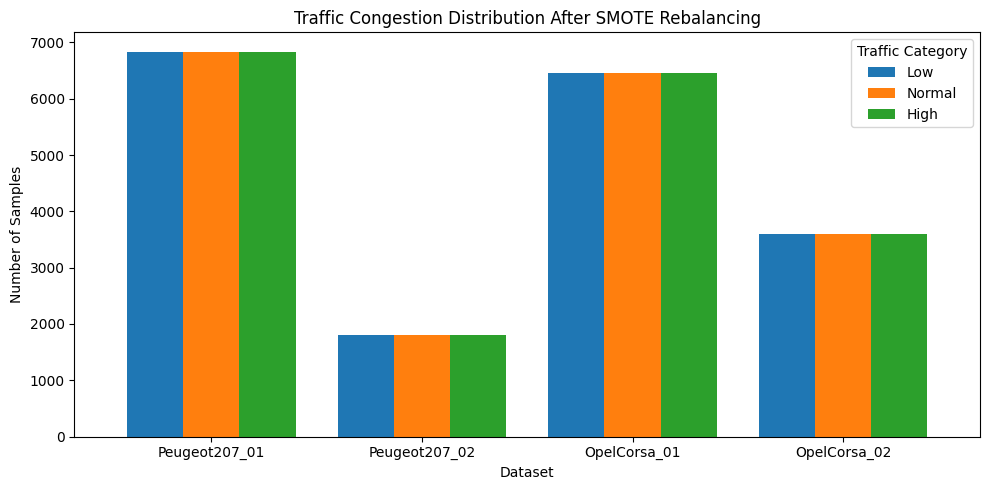

In [ ]:
# Collect counts after SMOTE for all datasets
smote_counts = {}
for name, data in smote_data.items():
    y_bal = data['y']
    smote_counts[name] = y_bal.value_counts().sort_index()  # Ensure classes are in order

# Create a DataFrame for plotting
df_counts = pd.DataFrame(smote_counts).T  # datasets as rows, classes as columns
df_counts.columns = ['Low', 'Normal', 'High']  # Adjust based on your class labels

# Plot grouped bar chart
ax = df_counts.plot(kind='bar', figsize=(10,5), width=0.8)
plt.title("Traffic Congestion Distribution After SMOTE Rebalancing")
plt.ylabel("Number of Samples")
plt.xlabel("Dataset")
plt.xticks(rotation=0)
plt.legend(title="Traffic Category")
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, log_loss, hinge_loss
from sklearn.preprocessing import label_binarize
import numpy as np

def train_models_with_train_test_cost_bulk(smote_data, test_size=0.2):
    """
    Train Logistic Regression and SVM models on multiple datasets,
    compute predictions, classification reports, and cost functions
    (Log Loss for LR, Hinge Loss for SVM) for both train and test sets.
    """
    model_results = {}

    for name, data in smote_data.items():
        X = data['X']
        y = data['y']

        # Train-test split
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=test_size, random_state=42, stratify=y
        )

        # Logistic Regression
        lr = LogisticRegression(max_iter=1000, random_state=42, multi_class='multinomial')
        lr.fit(X_train, y_train)
        y_pred_lr_train = lr.predict(X_train)
        y_proba_lr_train = lr.predict_proba(X_train)
        y_pred_lr_test = lr.predict(X_test)
        y_proba_lr_test = lr.predict_proba(X_test)
        logloss_train = log_loss(y_train, y_proba_lr_train)
        logloss_test = log_loss(y_test, y_proba_lr_test)

        # SVM
        svm = SVC(kernel='rbf', random_state=42, probability=True)
        svm.fit(X_train, y_train)
        y_pred_svm_train = svm.predict(X_train)
        y_scores_svm_train = svm.decision_function(X_train)
        y_pred_svm_test = svm.predict(X_test)
        y_scores_svm_test = svm.decision_function(X_test)

        # Multiclass hinge loss
        y_train_bin = label_binarize(y_train, classes=np.unique(y))
        y_test_bin = label_binarize(y_test, classes=np.unique(y))
        hinge_loss_train = np.mean([hinge_loss(y_train_bin[:, i], y_scores_svm_train[:, i])
                                    for i in range(y_train_bin.shape[1])])
        hinge_loss_test = np.mean([hinge_loss(y_test_bin[:, i], y_scores_svm_test[:, i])
                                   for i in range(y_test_bin.shape[1])])

        # Store results
        model_results[name] = {
            'LogisticRegression': classification_report(y_test, y_pred_lr_test, output_dict=True),
            'SVM': classification_report(y_test, y_pred_svm_test, output_dict=True),
            'y_test': y_test,
            'y_pred_lr': y_pred_lr_test,
            'y_pred_svm': y_pred_svm_test,
            'LogLoss_LR_train': logloss_train,
            'LogLoss_LR_test': logloss_test,
            'HingeLoss_SVM_train': hinge_loss_train,
            'HingeLoss_SVM_test': hinge_loss_test,
            'lr_model': lr,
            'svm_model': svm,
            'X_test': X_test
        }

        print(f"{name} - Models trained with train & test cost functions computed successfully")

    return model_results


In [ ]:
# Train models and compute train & test cost functions
model_results = train_models_with_train_test_cost_bulk(smote_data)

for name, results in model_results.items():
    print(f"\n=== {name} Cost Functions ===")

    # Logistic Regression
    print(f"Logistic Regression → Train Log Loss: {results['LogLoss_LR_train']:.4f}")
    print(f"Logistic Regression → Test Log Loss: {results['LogLoss_LR_test']:.4f}")

    # SVM
    print(f"SVM → Train Hinge Loss: {results['HingeLoss_SVM_train']:.4f}")
    print(f"SVM → Test Hinge Loss: {results['HingeLoss_SVM_test']:.4f}")


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Peugeot207_01 - Models trained with train & test cost functions computed successfully


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Peugeot207_02 - Models trained with train & test cost functions computed successfully


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


OpelCorsa_01 - Models trained with train & test cost functions computed successfully


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


OpelCorsa_02 - Models trained with train & test cost functions computed successfully

=== Peugeot207_01 Cost Functions ===
Logistic Regression → Train Log Loss: 0.6467
Logistic Regression → Test Log Loss: 0.6329
SVM → Train Hinge Loss: 0.9264
SVM → Test Hinge Loss: 0.9293

=== Peugeot207_02 Cost Functions ===
Logistic Regression → Train Log Loss: 0.4545
Logistic Regression → Test Log Loss: 0.4689
SVM → Train Hinge Loss: 0.9464
SVM → Test Hinge Loss: 0.9512

=== OpelCorsa_01 Cost Functions ===
Logistic Regression → Train Log Loss: 0.4929
Logistic Regression → Test Log Loss: 0.4999
SVM → Train Hinge Loss: 0.9207
SVM → Test Hinge Loss: 0.9202

=== OpelCorsa_02 Cost Functions ===
Logistic Regression → Train Log Loss: 0.3159
Logistic Regression → Test Log Loss: 0.2977
SVM → Train Hinge Loss: 0.8915
SVM → Test Hinge Loss: 0.8884


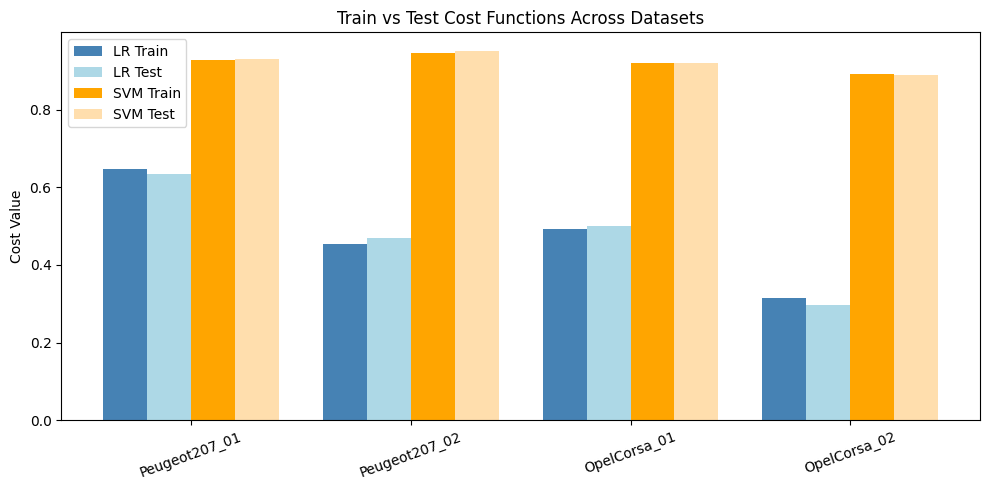

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

datasets = list(model_results.keys())
models = ['Logistic Regression', 'SVM']

# Collect losses
logloss_train = [model_results[d]['LogLoss_LR_train'] for d in datasets]
logloss_test  = [model_results[d]['LogLoss_LR_test'] for d in datasets]
hinge_train   = [model_results[d]['HingeLoss_SVM_train'] for d in datasets]
hinge_test    = [model_results[d]['HingeLoss_SVM_test'] for d in datasets]

x = np.arange(len(datasets))  # Dataset positions
width = 0.2  # Bar width

plt.figure(figsize=(10,5))

plt.bar(x - 1.5*width, logloss_train, width, label='LR Train', color='steelblue')
plt.bar(x - 0.5*width, logloss_test, width, label='LR Test', color='lightblue')
plt.bar(x + 0.5*width, hinge_train, width, label='SVM Train', color='orange')
plt.bar(x + 1.5*width, hinge_test, width, label='SVM Test', color='navajowhite')

plt.xticks(x, datasets, rotation=20)
plt.ylabel("Cost Value")
plt.title("Train vs Test Cost Functions Across Datasets")
plt.legend()
plt.tight_layout()
plt.show()



=== Evaluation for Peugeot207_01 ===

--- LogisticRegression ---
F1-score (macro): 0.6956
Confusion Matrix:
[[ 924  332  111]
 [ 397  748  223]
 [  28  138 1202]]
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.68      0.68      1367
           1       0.61      0.55      0.58      1368
           2       0.78      0.88      0.83      1368

    accuracy                           0.70      4103
   macro avg       0.69      0.70      0.70      4103
weighted avg       0.69      0.70      0.70      4103

Macro-average ROC AUC: 0.7753


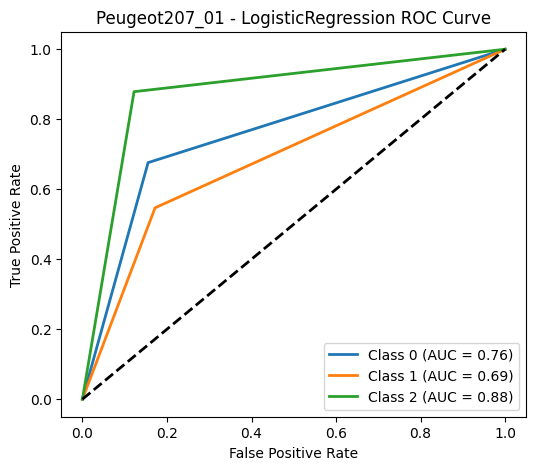


--- SVM ---
F1-score (macro): 0.9576
Confusion Matrix:
[[1262   74   31]
 [  12 1338   18]
 [   0   39 1329]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.92      0.96      1367
           1       0.92      0.98      0.95      1368
           2       0.96      0.97      0.97      1368

    accuracy                           0.96      4103
   macro avg       0.96      0.96      0.96      4103
weighted avg       0.96      0.96      0.96      4103

Macro-average ROC AUC: 0.9682


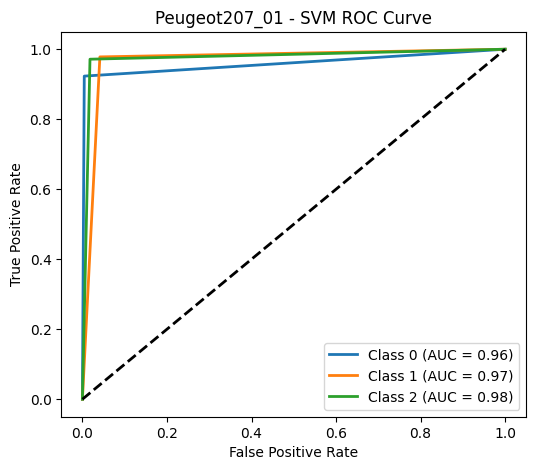


=== Evaluation for Peugeot207_02 ===

--- LogisticRegression ---
F1-score (macro): 0.7744
Confusion Matrix:
[[329  14  19]
 [ 34 264  64]
 [ 14  99 250]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       362
           1       0.70      0.73      0.71       362
           2       0.75      0.69      0.72       363

    accuracy                           0.78      1087
   macro avg       0.77      0.78      0.77      1087
weighted avg       0.77      0.78      0.77      1087

Macro-average ROC AUC: 0.8317


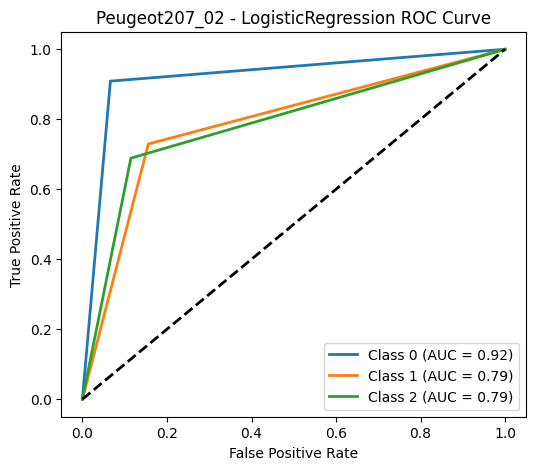


--- SVM ---
F1-score (macro): 0.9397
Confusion Matrix:
[[360   1   1]
 [ 20 321  21]
 [  8  14 341]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       362
           1       0.96      0.89      0.92       362
           2       0.94      0.94      0.94       363

    accuracy                           0.94      1087
   macro avg       0.94      0.94      0.94      1087
weighted avg       0.94      0.94      0.94      1087

Macro-average ROC AUC: 0.9552


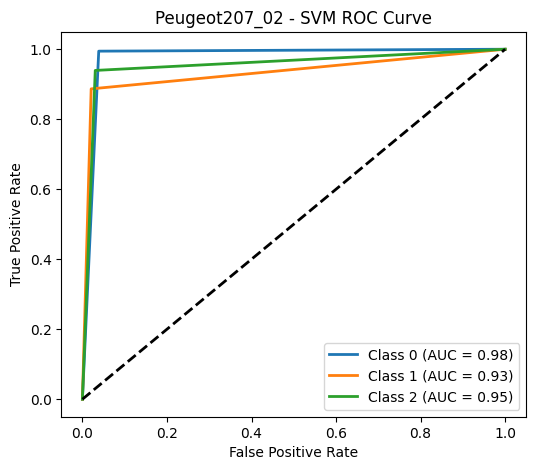


=== Evaluation for OpelCorsa_01 ===

--- LogisticRegression ---
F1-score (macro): 0.8250
Confusion Matrix:
[[ 824  230  238]
 [ 112 1180    0]
 [  66    9 1218]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.64      0.72      1292
           1       0.83      0.91      0.87      1292
           2       0.84      0.94      0.89      1293

    accuracy                           0.83      3877
   macro avg       0.83      0.83      0.83      3877
weighted avg       0.83      0.83      0.83      3877

Macro-average ROC AUC: 0.8733


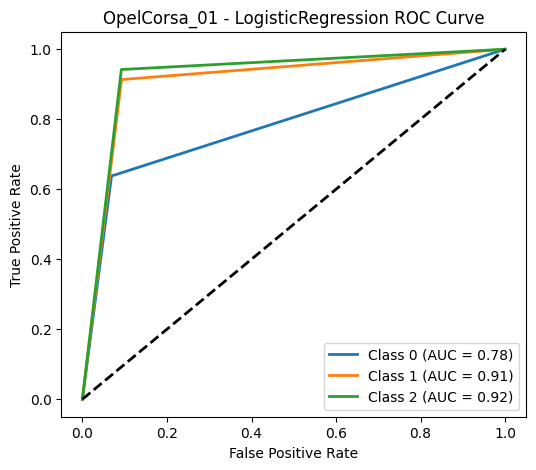


--- SVM ---
F1-score (macro): 0.9858
Confusion Matrix:
[[1237   10   45]
 [   0 1292    0]
 [   0    0 1293]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1292
           1       0.99      1.00      1.00      1292
           2       0.97      1.00      0.98      1293

    accuracy                           0.99      3877
   macro avg       0.99      0.99      0.99      3877
weighted avg       0.99      0.99      0.99      3877

Macro-average ROC AUC: 0.9894


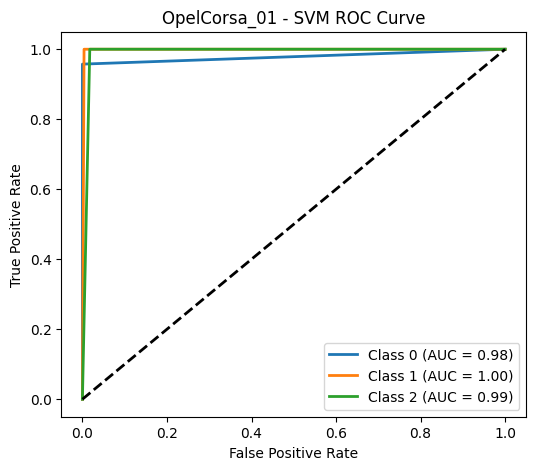


=== Evaluation for OpelCorsa_02 ===

--- LogisticRegression ---
F1-score (macro): 0.8873
Confusion Matrix:
[[587  99  32]
 [ 78 615  25]
 [  3   3 713]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.82      0.85       718
           1       0.86      0.86      0.86       718
           2       0.93      0.99      0.96       719

    accuracy                           0.89      2155
   macro avg       0.89      0.89      0.89      2155
weighted avg       0.89      0.89      0.89      2155

Macro-average ROC AUC: 0.9165


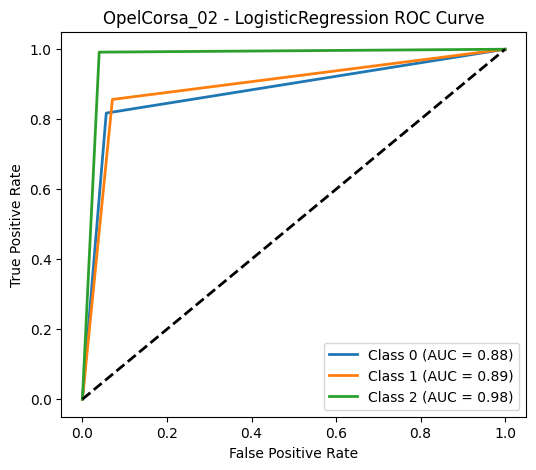


--- SVM ---
F1-score (macro): 0.9889
Confusion Matrix:
[[703  15   0]
 [  0 709   9]
 [  0   0 719]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       718
           1       0.98      0.99      0.98       718
           2       0.99      1.00      0.99       719

    accuracy                           0.99      2155
   macro avg       0.99      0.99      0.99      2155
weighted avg       0.99      0.99      0.99      2155

Macro-average ROC AUC: 0.9916


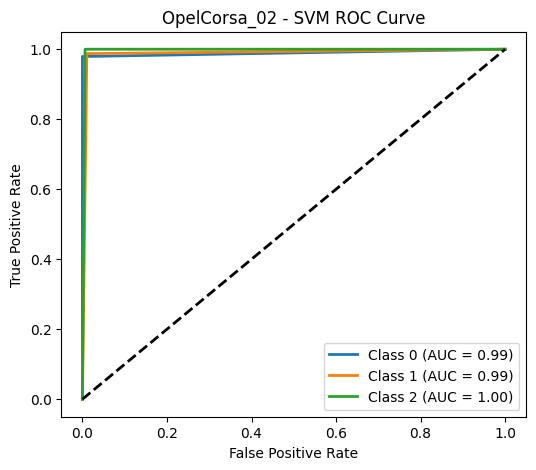

In [ ]:
# === MODEL EVALUATION IMPORTS ===
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve,
    auc,
    precision_score,
    recall_score,
    precision_recall_curve
)



def evaluate_models_bulk_corrected(model_results):
    model_key_map = {
        'LogisticRegression': 'y_pred_lr',
        'SVM': 'y_pred_svm'
    }

    for dataset_name, models in model_results.items():
        print(f"\n=== Evaluation for {dataset_name} ===")
        for model_name, pred_key in model_key_map.items():
            print(f"\n--- {model_name} ---")

            y_test = models['y_test']
            y_pred = models[pred_key]

            # F1-score
            f1 = f1_score(y_test, y_pred, average='macro')
            print(f"F1-score (macro): {f1:.4f}")

            # Confusion matrix
            conf_matrix = confusion_matrix(y_test, y_pred)
            print("Confusion Matrix:")
            print(conf_matrix)

            # Classification report
            print("Classification Report:")
            print(classification_report(y_test, y_pred))

            # ROC and AUC
            from sklearn.preprocessing import label_binarize
            import numpy as np

            y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
            y_pred_bin = label_binarize(y_pred, classes=np.unique(y_test))

            n_classes = y_test_bin.shape[1]
            fpr = dict()
            tpr = dict()
            roc_auc = dict()

            for i in range(n_classes):
                fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
                roc_auc[i] = auc(fpr[i], tpr[i])

            # Macro-average AUC
            all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
            mean_tpr = np.zeros_like(all_fpr)
            for i in range(n_classes):
                mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
            mean_tpr /= n_classes
            roc_auc_macro = auc(all_fpr, mean_tpr)
            print(f"Macro-average ROC AUC: {roc_auc_macro:.4f}")

            # Plot ROC
            plt.figure(figsize=(6, 5))
            for i in range(n_classes):
                plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
            plt.plot([0, 1], [0, 1], 'k--', lw=2)
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title(f'{dataset_name} - {model_name} ROC Curve')
            plt.legend(loc='lower right')
            plt.show()

# Run the corrected evaluation
evaluate_models_bulk_corrected(model_results)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

def print_bulk_reports(model_results):
    for dataset_name, models in model_results.items():
        print(f"\n=== Dataset: {dataset_name} ===")
        for model_name in ['LogisticRegression', 'SVM']:
            y_test = models['y_test']
            y_pred = models[f'y_pred_lr' if model_name=='LogisticRegression' else 'y_pred_svm']

            print(f"\n--- {model_name} ---")

            # Confusion matrix as table
            conf_matrix = pd.DataFrame(
                confusion_matrix(y_test, y_pred),
                columns=[f'Pred_{i}' for i in range(len(np.unique(y_test)))],
                index=[f'True_{i}' for i in range(len(np.unique(y_test)))]
            )
            print("Confusion Matrix:")
            print(conf_matrix)

            # Classification report as DataFrame
            class_report = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()
            print("\nClassification Report:")
            print(class_report)

# Run
print_bulk_reports(model_results)



=== Dataset: Peugeot207_01 ===

--- LogisticRegression ---
Confusion Matrix:
        Pred_0  Pred_1  Pred_2
True_0     924     332     111
True_1     397     748     223
True_2      28     138    1202

Classification Report:
              precision    recall  f1-score      support
0              0.684952  0.675933  0.680412  1367.000000
1              0.614122  0.546784  0.578500  1368.000000
2              0.782552  0.878655  0.827824  1368.000000
accuracy       0.700463  0.700463  0.700463     0.700463
macro avg      0.693875  0.700457  0.695579  4103.000000
weighted avg   0.693877  0.700463  0.695582  4103.000000

--- SVM ---
Confusion Matrix:
        Pred_0  Pred_1  Pred_2
True_0    1262      74      31
True_1      12    1338      18
True_2       0      39    1329

Classification Report:
              precision    recall  f1-score      support
0              0.990581  0.923189  0.955699  1367.000000
1              0.922123  0.978070  0.949273  1368.000000
2              0.964441  

Based on these results

Logistic Regression: Evaluates probability accuracy; lower Log Loss is better.

SVM: Evaluates class separation; lower Hinge Loss is better.

Overall: SVM tends to outperform Logistic Regression for this multiclass traffic congestion problem, but both metrics provide complementary insights into model performance.